# Exp 4: Image Compression #
## 1.	Aims ##

#### 1. Be familiar with some basic image fidelity assessment methods such as MSE, PSNR and SSIM.

#### 2. Be familiar with the process of JPEG compression.
    
#### 3. Be familiar with Discrete Cosine Transform, Huffman Coding, and Predictive Coding.

In [1]:
import os
import cv2
import zipfile
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy.ndimage import gaussian_filter
from skimage import io, metrics, img_as_float

## 2.	Steps and Requirements

### (1) Compression Ratio and Relative Coding Redundancy
(a) Load the image bunny.png. Save it as a JPEG image with a quality factor of 90, 60, 10, respectively. Name the images as b90.jpg, b60.jpg, b10.jpg, respectively. 

(b) Display the original image and the compressed images.

(c) Calculate the *Compression Ratio* and *Relative Data Redundancy* between the PNG image and JPEG images according to the file sizes. (Tips: ``os.path.getsize``)

In [2]:
# 创建保存结果的文件夹
result_folder = "results"
os.makedirs(result_folder, exist_ok=True)

In [3]:
original = io.imread("images/bunny.png")

In [4]:
# （a）保存JPEG图像
quality_factors = [90, 60, 10]
jpeg_filenames = []
for qf in quality_factors:
    jpeg_filename = f"b{qf}.jpg"
    jpeg_filenames.append(jpeg_filename)
    io.imsave(os.path.join(result_folder, jpeg_filename), original, quality=qf)

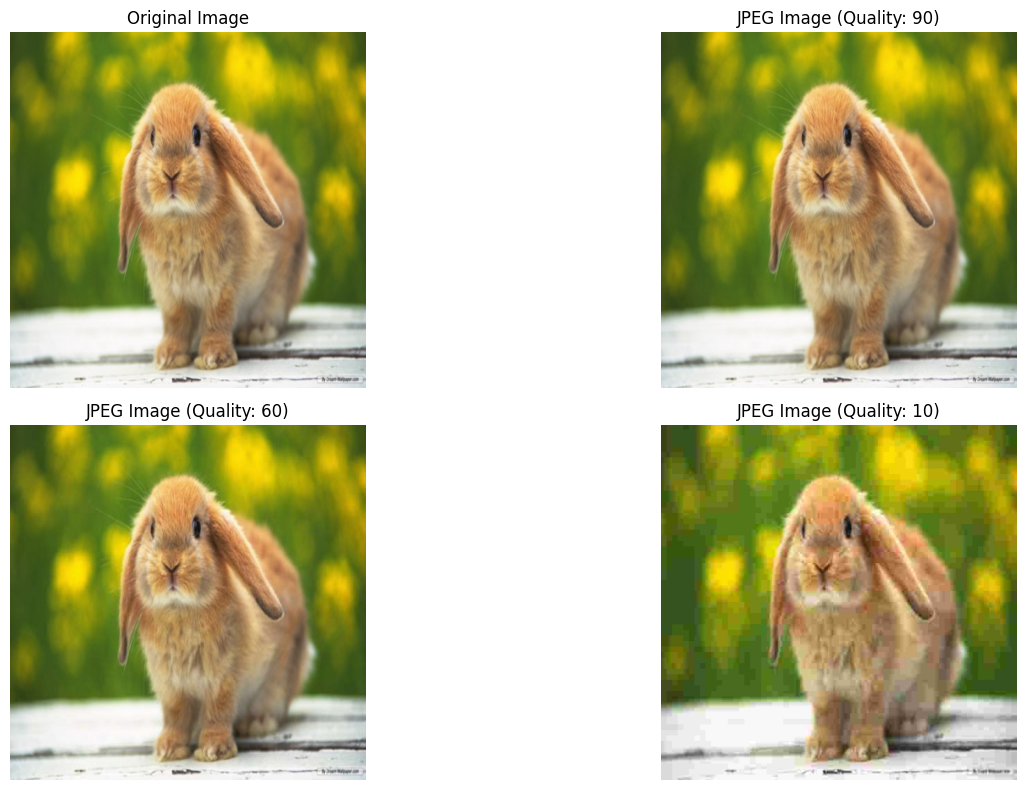

In [5]:
# （b）显示原始图像和压缩图像
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.imshow(original)
plt.title("Original Image")
plt.axis("off")

for i, jpeg_filename in enumerate(jpeg_filenames):
    compressed_image = io.imread(os.path.join(result_folder, jpeg_filename))
    plt.subplot(2, 2, i + 2)
    plt.imshow(compressed_image)
    plt.title(f"JPEG Image (Quality: {quality_factors[i]})")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [6]:
# （c）计算压缩比和相对数据冗余
png_filesize = os.path.getsize("images/bunny.png")

# 存储结果的列表
results = []

for jpeg_filename in jpeg_filenames:
    jpeg_filesize = os.path.getsize(os.path.join(result_folder, jpeg_filename))
    compression_ratio = png_filesize / jpeg_filesize
    redundancy = 1 - (1 / compression_ratio)
    results.append([jpeg_filename, f"{compression_ratio:.2f}", f"{redundancy:.2f}"])

# 打印表格
print(tabulate(results, headers=["文件名", "压缩比", "相对数据冗余"], tablefmt="grid", colalign=("center", "center", "center")))

+----------+----------+----------------+
|  文件名  |  压缩比  |  相对数据冗余  |
+==========+==========+================+
| b90.jpg  |   8.4    |      0.88      |
+----------+----------+----------------+
| b60.jpg  |  18.66   |      0.95      |
+----------+----------+----------------+
| b10.jpg  |  48.14   |      0.98      |
+----------+----------+----------------+


 ### (2) Fidelity Criteria 
(a) Load the saved JPEG images. Use functions from ``skimage.metrics`` to calculate MSE, PSNR, and SSIM values between the PNG image and JPEG images. 

(b) Implement a SSIM function by yourself according to [1].

[1] Wang Z, Bovik AC, Sheikh HR, Simoncelli EP. Image quality assessment: from error visibility to structural similarity. IEEE Trans Image Process. 2004 Apr;13(4):600-12.

In [7]:
# 加载保存的JPEG图像
jpeg_images = []
for jpeg_filename in jpeg_filenames:
    jpeg_image = io.imread(os.path.join(result_folder, jpeg_filename))
    jpeg_images.append(jpeg_image)

In [8]:
# 存储结果的列表
results = []

# 计算MSE、PSNR和SSIM值
for i, jpeg_image in enumerate(jpeg_images):
    mse = metrics.mean_squared_error(original, jpeg_image)
    psnr = metrics.peak_signal_noise_ratio(original, jpeg_image)
    ssim = metrics.structural_similarity(original, jpeg_image, win_size=3, multichannel=True)
    results.append([jpeg_filenames[i], f"{mse:.2f}", f"{psnr:.2f} dB", f"{ssim:.4f}"])

# 打印表格
print(tabulate(results, headers=["文件名", "MSE", "PSNR", "SSIM"], tablefmt="grid", colalign=("center", "center", "center", "center")))

+----------+-------+----------+--------+
|  文件名  |  MSE  |   PSNR   |  SSIM  |
+==========+=======+==========+========+
| b90.jpg  | 2.96  | 43.41 dB | 0.9956 |
+----------+-------+----------+--------+
| b60.jpg  | 8.69  | 38.74 dB | 0.9893 |
+----------+-------+----------+--------+
| b10.jpg  | 62.48 | 30.17 dB | 0.9543 |
+----------+-------+----------+--------+


In [10]:
# 自定义SSIM函数的实现
def custom_ssim(img1, img2, C1=0.01**2, C2=0.03**2, sigma=1.5):
    # 将图像转换为灰度图
    img1 = rgb2gray(img1)
    img2 = rgb2gray(img2)
    
    # 高斯滤波
    mu1 = gaussian_filter(img1, sigma)
    mu2 = gaussian_filter(img2, sigma)
    mu1_sq = mu1 * mu1
    mu2_sq = mu2 * mu2
    mu1_mu2 = mu1 * mu2

    sigma1_sq = gaussian_filter(img1 * img1, sigma) - mu1_sq
    sigma2_sq = gaussian_filter(img2 * img2, sigma) - mu2_sq
    sigma12 = gaussian_filter(img1 * img2, sigma) - mu1_mu2

    # 计算SSIM
    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) * (sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean()

In [11]:
# 使用自定义SSIM函数计算SSIM值
for i, jpeg_image in enumerate(jpeg_images):
    custom_ssim_value = custom_ssim(original, jpeg_image)
    print(f"JPEG文件 '{jpeg_filenames[i]}'的自定义SSIM值: {custom_ssim_value:.4f}")

JPEG文件 'b90.jpg'的自定义SSIM值: 0.9903
JPEG文件 'b60.jpg'的自定义SSIM值: 0.9747
JPEG文件 'b10.jpg'的自定义SSIM值: 0.8799


### (3) Simulation of a Part of JPEG Compression
(a) Load the grayscale image lenagray.tiff.

(b) Shift the pixel intensity by -128. 

(c) Divide the image into non-overlapped 8$*$8 subimages and perform 8$*$8 block DCT on each subimage. (Tips: ``cv2.dct`` or ``scipy.fftpack.dct``)

(d) Use a quantization table with QF=50 for quantization. 

(e) Perform lossless predictive coding (difference coding) of DC coefficients by using the coefficient in the previous subimage as reference (a raster scan mannar).  

(f) Sort 63 AC coefficients in each block in a ZigZag order. Converted them into a one-dimensional vector. 

(g) Save all the compressed data into a Numpy data format (refered to as NPY/NPZ (.npy or .npz) file)  (Tips: ``np.save`` or ``np.savez``).

(h) Compress the npy/npz file to a zip file (refered to as NPZzip). Compress the TIFF image to another zip file (refered to as TIFFzip) (Tips: ``zipfile.Zipfile``, ``zipfile.write``, ``zipfile.close``. For more details please refer to https://docs.python.org/3/library/zipfile.html and https://cloud.tencent.com/developer/article/1431438).

(i) Calculate the Compression Ratio between the TIFF image and the NPY/NPZ file according to the file sizes. Calculate the Compression Ratio between the TIFF image and the NPZzip file according to the file sizes. Calculate the Compression Ratio between the TIFFZzip and the NPZzip according to the file sizes.

(j) Load the above saved file. Decode it to a recovered image.

(k) Compute the MSE and PSNR of the recovered image, and display it with the original image side by side.

``quantization_table = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
[12, 12,14, 19, 26, 58, 60, 55],
[14, 13, 16, 24, 40, 57, 69, 56],
[14, 17, 22, 29, 51, 87, 80, 62],
[18, 22, 37, 56, 68, 109, 103, 77],
[24, 35, 55, 64, 81, 104, 113, 92],
[49, 64, 78, 87, 103, 121, 120, 101],
[72, 92, 95, 98, 112, 100, 103, 99]], dtype=np.float32)``

In [12]:
# (a) 加载灰度图像lenagray.tiff
image = cv2.imread("images/lenagray.tiff", cv2.IMREAD_GRAYSCALE)

(-0.5, 511.5, 511.5, -0.5)

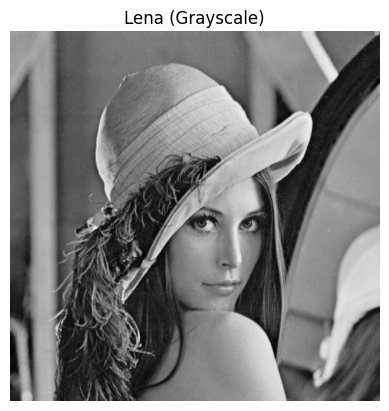

In [13]:
plt.imshow(image, cmap="gray")
plt.title("Lena (Grayscale)")
plt.axis("off")

In [14]:
# (b) 将像素强度移动-128
image -= 128

In [15]:
# (c) 划分图像为8x8块，并对每个块执行8x8 DCT
blocks = []

for i in range(0, image.shape[0], 8):
    for j in range(0, image.shape[1], 8):
        block = np.float32(image[i:i+8, j:j+8])
        dct_block = cv2.dct(block)
        blocks.append(dct_block)

In [16]:
# (d) 使用QF=50的量化表进行量化
quantization_table = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                               [12, 12, 14, 19, 26, 58, 60, 55],
                               [14, 13, 16, 24, 40, 57, 69, 56],
                               [14, 17, 22, 29, 51, 87, 80, 62],
                               [18, 22, 37, 56, 68, 109, 103, 77],
                               [24, 35, 55, 64, 81, 104, 113, 92],
                               [49, 64, 78, 87, 103, 121, 120, 101],
                               [72, 92, 95, 98, 112, 100, 103, 99]], dtype=np.float32)

quantized_blocks = [np.round(block / quantization_table) for block in blocks]

In [17]:
# (e) 执行DC系数的无损预测编码
dc_coefficients = [block[0, 0] for block in quantized_blocks]
dc_differences = [dc_coefficients[i] - dc_coefficients[i-1] for i in range(1, len(dc_coefficients))]
dc_encoded = np.array(dc_differences, dtype=np.int32)

In [18]:
# (f) 对每个块中的63个AC系数进行ZigZag排序并转换为一维向量
ac_vectors = []
for block in quantized_blocks:
    ac_vector = np.concatenate([np.diagonal(block[::-1, :], i)[::(2*(i % 2)-1)] for i in range(1-block.shape[0], block.shape[0])])
    ac_vectors.append(ac_vector)

In [19]:
# (g) 保存压缩数据为NPZ文件
np.savez("results/compressed_data.npz", dc=dc_encoded, ac=ac_vectors)

In [20]:
# (h) 将npy/npz文件压缩为zip文件
with zipfile.ZipFile("results/NPZzip.zip", "w") as npz_zip:
    npz_zip.write("results/compressed_data.npz")

In [21]:
# (i) 计算压缩比
tiff_filesize = os.path.getsize("images/lenagray.tiff")
npz_filesize = os.path.getsize("results/compressed_data.npz")
npzzip_filesize = os.path.getsize("results/NPZzip.zip")
tiff_to_npz_ratio = tiff_filesize / npz_filesize
tiff_to_npzzip_ratio = tiff_filesize / npzzip_filesize

In [22]:
print(f"TIFF图像与NPY/NPZ文件之间的压缩比: {tiff_to_npz_ratio:.2f}")
print(f"TIFF图像与NPZzip文件之间的压缩比: {tiff_to_npzzip_ratio:.2f}")

TIFF图像与NPY/NPZ文件之间的压缩比: 0.25
TIFF图像与NPZzip文件之间的压缩比: 0.25


In [23]:
# (j) 加载保存的文件并解码为恢复的图像
with zipfile.ZipFile("results/NPZzip.zip", "r") as npz_zip:
    npz_zip.extractall()
compressed_data = np.load("results/compressed_data.npz")
dc_encoded = compressed_data['dc']
ac_vectors = compressed_data['ac']

In [24]:
# (k) 解码为恢复的图像
# DC系数的解码
dc_coefficients = [dc_encoded[0]]
for diff in dc_encoded[1:]:
    dc_coefficients.append(dc_coefficients[-1] + diff)
dc_blocks = [np.zeros((8, 8), dtype=np.float32)]
for dc_coeff in dc_coefficients:
    dc_blocks.append(np.full((8, 8), dc_coeff))
# AC系数的解码
ac_blocks = []
for ac_vector in ac_vectors:
    ac_matrix = np.zeros((8, 8), dtype=np.float32)
    for i, val in enumerate(ac_vector):
        row, col = divmod(i, 8)
        ac_matrix[row, col] = val
    ac_blocks.append(ac_matrix)
# 反量化
dequantized_blocks = [block * quantization_table for block in ac_blocks]
# 逆DCT
reconstructed_blocks = [cv2.idct(cv2.idct(dc_block + dequantized_block, flags=cv2.DCT_INVERSE), flags=cv2.DCT_INVERSE) \
                        for dc_block, dequantized_block in zip(dc_blocks, dequantized_blocks)]
# 重组图像
reconstructed_image = np.zeros(image.shape)
for i, block in enumerate(reconstructed_blocks):
    row, col = divmod(i, image.shape[1] // 8)
    row *= 8
    col *= 8
    reconstructed_image[row:row+8, col:col+8] = block
# 恢复图像
reconstructed_image += 128
reconstructed_image = np.clip(reconstructed_image, 0, 255).astype(np.uint8)

In [25]:
# (l) 计算恢复图像的MSE和PSNR
mse = np.mean((image - reconstructed_image) ** 2)
psnr = 10 * np.log10(255 ** 2 / mse)
print(f"恢复图像的MSE: {mse:.2f}")
print(f"恢复图像的PSNR: {psnr:.2f} dB")

恢复图像的MSE: 105.09
恢复图像的PSNR: 27.91 dB


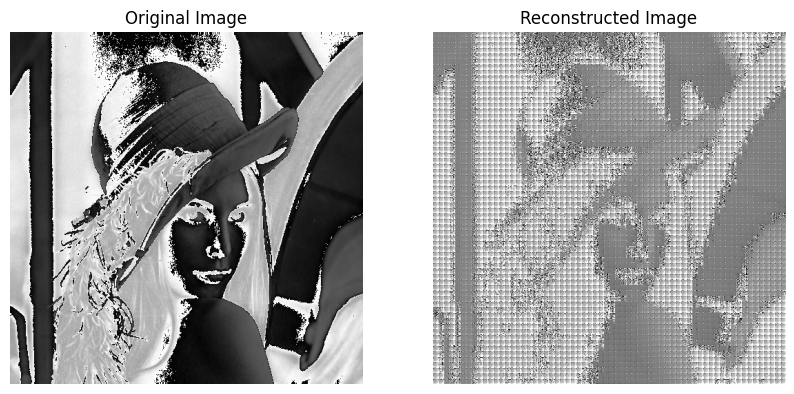

In [26]:
# (m) 显示原始图像和恢复图像
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap="gray")
plt.title("Reconstructed Image")
plt.axis("off")

plt.show()

## 3.	Requirements of Experiment Report ##
#### (1) Use the Jupyter Notebook to write and test codes. 
#### (2) Display the results in the Jupyter Notebook.
#### (3) Sumbit the report according to the template including the corresponding codes and results. 
#### (4) The report is required to be tidy with clear procedures.
#### (5) The codes should be concise and give some necessary comments.